# Tarea 4. Pandas Intermedio (yo no escogí el nombre)

🐼

1) Lee los datos la NBA includos dentro de la carpeta "Datos" adjunta en esta tarea.
* Crea un DataFrame donde filtres a todos los jugadores de la semana (MVP) del 2019 (usa la columna 'Season short' para no complicarte).

* Usa el método groupby() en tus datos filtrados para agruparlos por **conferencia** y **posición**. Usa el método count() para hacer un conteo sobre el número de MVP's que hubo por cada una de las posiciones de juego.

* Recicla tu código del inciso anterior y usa la función unstack para generar un DataFrame donde las columnas sean las posiciones de juego. Haz una gráfica de tus resultados. Tiene que verse más o menos como:

<img src="Imágenes/Tarea4-1.png" width="400"/> 

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Datos\\NBA_player_of_the_week.csv")

In [3]:
datos.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0


In [4]:
MVP_2019 = datos[datos['Season short'] == 2019]

In [5]:
MVP_2019.groupby(['Conference','Position'])[['Player']].count()

Player
Conference Position        
East       C              2
           F             11
           G              2
           PF             2
           PG             1
           SG             3
West       C              4
           F              1
           FC             1
           G              4
           GF             3
           PF             1
           PG             1
           SG             6

In [6]:
df_unstack=MVP_2019.groupby(['Conference','Position'])[['Player']].count().unstack(level=-1)
df_unstack

Player                                    
Position        C     F   FC    G   GF   PF   PG   SG
Conference                                           
East          2.0  11.0  NaN  2.0  NaN  2.0  1.0  3.0
West          4.0   1.0  1.0  4.0  3.0  1.0  1.0  6.0

In [7]:
plt.style.use('seaborn-pastel')

<Figure size 720x360 with 0 Axes>

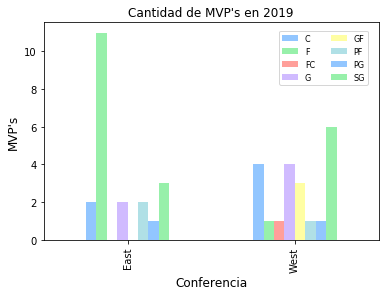

In [46]:
# Dataframe con unstack
# Crear gráfica
plt.figure(figsize=(10,5))
df_unstack.plot(kind='bar')
plt.xlabel("Conferencia", fontsize=12)
plt.ylabel("MVP's", fontsize=12)
plt.title("Cantidad de MVP's en 2019")
# legend: Ayuda a colocar en el lugar adecuado la leyenda de la gráfica
plt.legend(loc="upper right", ncol=2, bbox_to_anchor=(0.98,0.98), fontsize= 8 )
plt.show()

2) Ahora haz la lectura de los datos sobre el carbono negro tambien includos dentro de la carpeta "Datos".

* Crea una variable nueva de día de la semana que vaya de [lunes-domingo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html).

* Agrupa por día de la semana y obten los valores máximos de carbono negro que se registraron por día. 

* Crea una columna de hora (sólo hora, no minutos, no segundos). Agrupa por hora, ¿a qué hora hay en promedio mayor carbono negro en el ambiente? ¿Hay algún insight que quieras hacer referencia? No olvides graficar. Deberías obtener algo como lo siguiente:
  
<img src="Imágenes/Tarea4-2.png" width="600"/> 
 
  **HINT**: Utiliza el método split() para eliminar la parte correspondiente a los minutos y los segundos de la columna "hora".

In [202]:
df_carbono=pd.read_excel('Datos\\carbono.xlsx')


In [203]:
df_carbono.head()

,hora,fecha,coedisp,abso,albedo,extinc,cn
0,00:02:00,2017-01-01,19.2,3.51,0.845443,22.71,0.746809
1,00:03:00,2017-01-01,18.8,3.59,0.839661,22.39,0.763830
2,00:04:00,2017-01-01,25.8,4.03,0.864901,29.83,0.857447
3,00:05:00,2017-01-01,20.3,3.82,0.841625,24.12,0.812766
4,00:06:00,2017-01-01,19.7,3.94,0.833333,23.64,0.838298


In [204]:
df_carbono['fecha'] = pd.to_datetime(df_carbono.fecha)


In [205]:
df_carbono.dtypes

hora               object
fecha      datetime64[ns]
coedisp           float64
abso              float64
albedo            float64
extinc            float64
cn                float64
dtype: object

In [206]:
df_carbono['Dia semana'] = df_carbono.fecha.dt.day_name()
df_carbono['Dia semana']

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
           ...  
241949    Friday
241950    Friday
241951    Friday
241952    Friday
241953    Friday
Name: Dia semana, Length: 241954, dtype: object

In [207]:
df_max=df_carbono.groupby('Dia semana').max()
df_max[['cn']]

,cn
Dia semana,
Friday,17.3830
Monday,10.3404
Saturday,11.9574
Sunday,12.8085
Thursday,12.2553
Tuesday,12.2340
Wednesday,11.9149


In [208]:
df_carbono['solo hora']= ([x.hour for x in df_carbono['hora']]) 

In [209]:
df_carbono.tail()

,hora,fecha,coedisp,abso,albedo,extinc,cn,Dia semana,solo hora
241949,23:56:00,2017-06-30,1.430,2.08,0.407407,3.510,0.442553,Friday,23
241950,23:57:00,2017-06-30,0.681,1.80,0.274486,2.481,0.382979,Friday,23
241951,23:58:00,2017-06-30,1.560,2.08,0.428571,3.640,0.442553,Friday,23
241952,23:59:00,2017-06-30,2.060,1.96,0.512438,4.020,0.417021,Friday,23
241953,23:59:55,2017-06-30,1.990,1.83,0.520942,3.820,0.389362,Friday,23


In [210]:
df_hora=df_carbono.groupby('solo hora').mean()
df_hora['cn']

solo hora
0     0.807054
1     0.828311
2     0.814618
3     0.894431
4     0.956819
5     1.065396
6     1.392024
7     2.001228
8     1.904435
9     1.211463
10    0.833092
11    0.632945
12    0.507051
13    0.454253
14    0.465079
15    0.473843
16    0.484128
17    0.555467
18    0.640672
19    0.766936
20    0.851710
21    0.871365
22    0.842908
23    0.831315
Name: cn, dtype: float64

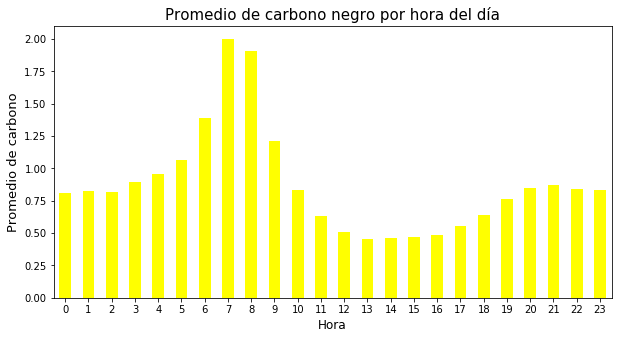

In [211]:
plt.figure(figsize=(10,5))
df_hora['cn'].plot(kind='bar', color='yellow', rot=0)
plt.xlabel("Hora", fontsize=12)
plt.title("Promedio de carbono negro por hora del día", fontsize=15)
plt.ylabel("Promedio de carbono", fontsize=13)

plt.show()

3) Grafica lo siguiente:

* Cantidad de valores nulos hay por columna.
* Cantidad de valores nulos hay por columna pero ahora en terminos porcentaje.
    
### **NO muestres las columnas que NO tengan valores nulos.**

In [212]:
df_nulos=df_carbono.isnull().sum()

In [226]:
df_nulos = df_nulos[df_nulos>0]
df_nulos

coedisp      996
abso       13691
albedo     14337
extinc     14337
cn         13691
dtype: int64

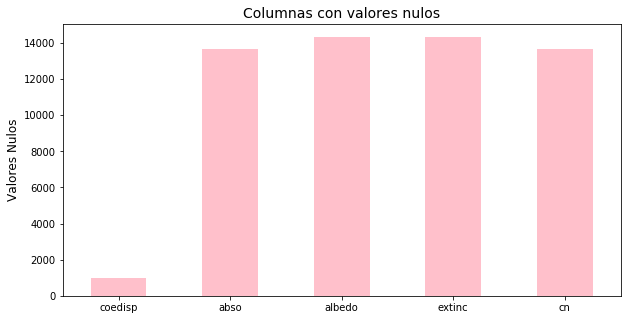

In [227]:
plt.figure(figsize=(10,5))
df_nulos.plot(kind='bar', rot=0, color='pink')
plt.ylabel("Valores Nulos", fontsize=12)
plt.title("Columnas con valores nulos", fontsize=14)

plt.show()

In [223]:
#Contamos el total de datos que tenemos en el dataframe
datos_total=df_carbono.shape[0]

In [230]:
df_nulos_pct=(df_nulos/datos_total)*100
df_nulos_pct

coedisp    0.411648
abso       5.658514
albedo     5.925507
extinc     5.925507
cn         5.658514
dtype: float64

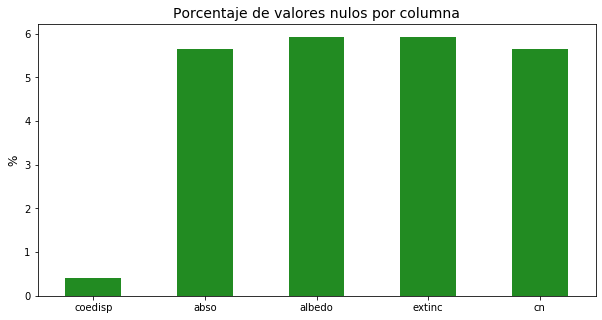

In [241]:
plt.figure(figsize=(10,5))
df_nulos_pct.plot(kind = 'bar', rot = 0, color ='forestgreen')
plt.ylabel("%", fontsize=12)
plt.title("Porcentaje de valores nulos por columna", fontsize=14)
plt.show()

4) Grafica el comportamiento del carbono negro por mes (tienes que crear la variable mes) y hora.

* ¿En qué mes mejoró la calidad del promedio del aire? 
    
* ¿Qué rango de horas es el ideal para hacer actividades al aire libre?

* Haz una gráfica que nos permita visualizar las respuestas de los dos incisos anteriores. Tu gráfica debe verse algo así:

<img src="Imágenes/Tarea4-3.png" width="600"/> 

5) Filtra los valores donde se tiene un valor de carbono negro mayor al cuantil 69. 
* ¿Cuál es el número de datos que perdiste?
* ¿Cuál es el porcentaje de datos que perdiste?
* Obten los histogramas de los datos con el filtro y sin el filtro. ¿Qué puedes decir al respecto de ellos?